In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  2


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [4]:
# CIFAR-10 Class Names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
# Load CIFAR-10 Dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
# Convert y_train and y_test to 1D arrays
y_train = y_train.flatten()
y_test = y_test.flatten()


In [7]:
# Filter for the first 4 classes (0-3) for a 4-class problem
selected_classes = [0, 1, 2, 3]
train_filter = np.isin(y_train, selected_classes)
test_filter = np.isin(y_test, selected_classes)

In [8]:
X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

In [9]:
# Normalize Images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
# Flatten Images for Classifiers that Require 2D Input
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train_flat, y_train)
bagging_preds = bagging_model.predict(X_test_flat)
print("\nBagging Model Accuracy:", accuracy_score(y_test, bagging_preds))



Bagging Model Accuracy: 0.62425


In [12]:
print("Bagging Model Summary:")
print(bagging_model)

Bagging Model Summary:
BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)


In [13]:
# Gradient Boosting Classifier
boosting_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
boosting_model.fit(X_train_flat, y_train)
boosting_preds = boosting_model.predict(X_test_flat)
print("\nGradient Boosting Model Accuracy:", accuracy_score(y_test, boosting_preds))



Gradient Boosting Model Accuracy: 0.6705


In [14]:
print("Boosting Model Summary:")
print(boosting_model)

Boosting Model Summary:
GradientBoostingClassifier(n_estimators=50, random_state=42)


In [ ]:
import shap

# Define a wrapper to ensure correct prediction shape for SHAP
def model_predict_proba(X):
    return boosting_model.predict_proba(X).reshape(X.shape[0], -1)

# Initialize SHAP KernelExplainer with a subset of training data
explainer = shap.KernelExplainer(model_predict_proba, X_train_flat[:100])

# Generate SHAP values for a subset of test data
shap_values = explainer.shap_values(X_test_flat[:4])




shap_values[0] shape after transposing: (4, 3072)
shap_values[1] shape after transposing: (4, 3072)
shap_values[2] shape after transposing: (4, 3072)
shap_values[3] shape after transposing: (4, 3072)
shap_values[4] shape after transposing: (4, 3072)
shap_values[5] shape after transposing: (4, 3072)
shap_values[6] shape after transposing: (4, 3072)
shap_values[7] shape after transposing: (4, 3072)
shap_values[8] shape after transposing: (4, 3072)
shap_values[9] shape after transposing: (4, 3072)


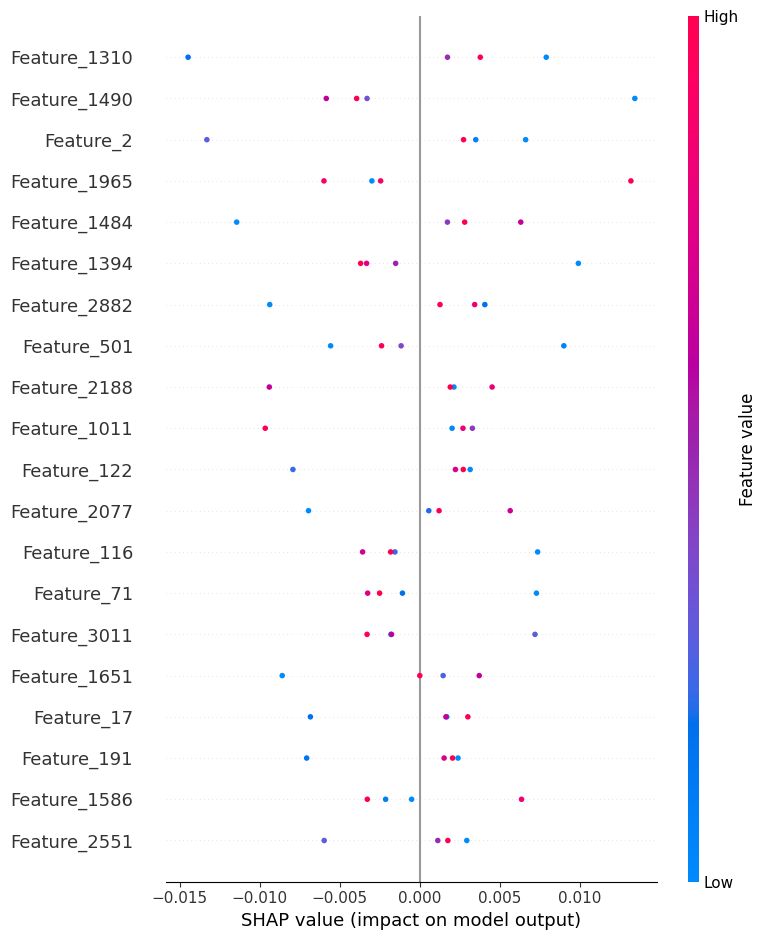

In [23]:
# Transpose SHAP values to match the expected shape for plotting
shap_values_transposed = [sv.T for sv in shap_values]

# Check the shapes of SHAP values
for i, sv in enumerate(shap_values_transposed):
    print(f"shap_values[{i}] shape after transposing: {sv.shape}")

# Plot SHAP summary for one class (e.g., class 0)
shap.summary_plot(
    shap_values_transposed[0],  # Explanations for class 0
    X_test_flat[:4],  # Input data for the same 10 samples
    feature_names=["Feature_" + str(i) for i in range(X_test_flat.shape[1])]  # Feature names
)

In [24]:
# Stacking Classifier
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42))
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train_flat, y_train)
stacking_preds = stacking_model.predict(X_test_flat)
print("\nStacking Model Accuracy:", accuracy_score(y_test, stacking_preds))

In [ ]:
print("Stacking Model Summary:")
print(stacking_model)

Stacking Model Summary:
StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('gb',
                                GradientBoostingClassifier(n_estimators=50,
                                                           random_state=42))],
                   final_estimator=LogisticRegression())


In [ ]:
from sklearn.neural_network import MLPClassifier

# ANN Model
ann_model = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=30, random_state=42, verbose=1)
ann_model.fit(X_train_flat, y_train)
ann_preds = ann_model.predict(X_test_flat)
print("\nANN Model Accuracy:", accuracy_score(y_test, ann_preds))

Iteration 1, loss = 1.24574175
Iteration 2, loss = 1.01743996
Iteration 3, loss = 0.95758681
Iteration 4, loss = 0.90695103
Iteration 5, loss = 0.85672155
Iteration 6, loss = 0.83610407
Iteration 7, loss = 0.81005905
Iteration 8, loss = 0.78924950
Iteration 9, loss = 0.76595397
Iteration 10, loss = 0.74414192
Iteration 11, loss = 0.72800801
Iteration 12, loss = 0.72927847
Iteration 13, loss = 0.71956620
Iteration 14, loss = 0.70520838
Iteration 15, loss = 0.70835127
Iteration 16, loss = 0.67216491
Iteration 17, loss = 0.68055320
Iteration 18, loss = 0.66075749
Iteration 19, loss = 0.64296173
Iteration 20, loss = 0.63012253
Iteration 21, loss = 0.63109403
Iteration 22, loss = 0.61300931
Iteration 23, loss = 0.60418039
Iteration 24, loss = 0.60831684
Iteration 25, loss = 0.59669698
Iteration 26, loss = 0.58349923
Iteration 27, loss = 0.57207157
Iteration 28, loss = 0.57422201
Iteration 29, loss = 0.57126095
Iteration 30, loss = 0.55803507
Iteration 31, loss = 0.54279557
Iteration 32, los

c:\Users\Administrator\anaconda3\envs\new_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print("ANN Model Summary:")
print(ann_model.get_params())

ANN Model Summary:
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (256, 128), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 50, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 1, 'warm_start': False}


In [ ]:
# Classification Report for ANN
print("\nClassification Report for ANN Model:\n")
print(classification_report(y_test, ann_preds, target_names=[class_names[i] for i in selected_classes]))


Classification Report for ANN Model:

              precision    recall  f1-score   support

    airplane       0.78      0.75      0.77      1000
  automobile       0.76      0.89      0.82      1000
        bird       0.66      0.68      0.67      1000
         cat       0.73      0.61      0.67      1000

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile CNN Model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
625/625 [==============================] - 11s 7ms/step - loss: 0.8004 - accuracy: 0.6743 - val_loss: 0.6393 - val_accuracy: 0.7423
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 0.5870 - accuracy: 0.7737 - val_loss: 0.5657 - val_accuracy: 0.7807
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 0.5099 - accuracy: 0.8008 - val_loss: 0.5296 - val_accuracy: 0.7895
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.4588 - accuracy: 0.8267 - val_loss: 0.5356 - val_accuracy: 0.7950
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.4148 - accuracy: 0.8396 - val_loss: 0.4708 - val_accuracy: 0.8167
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3714 - accuracy: 0.8600 - val_loss: 0.4659 - val_accuracy: 0.8163
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3293 - accuracy: 0.8759 - val_loss: 0.5233 - val_accuracy: 0.8123
Epoch

In [ ]:
print("CNN Model Summary:")
cnn_model.summary()

CNN Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 1

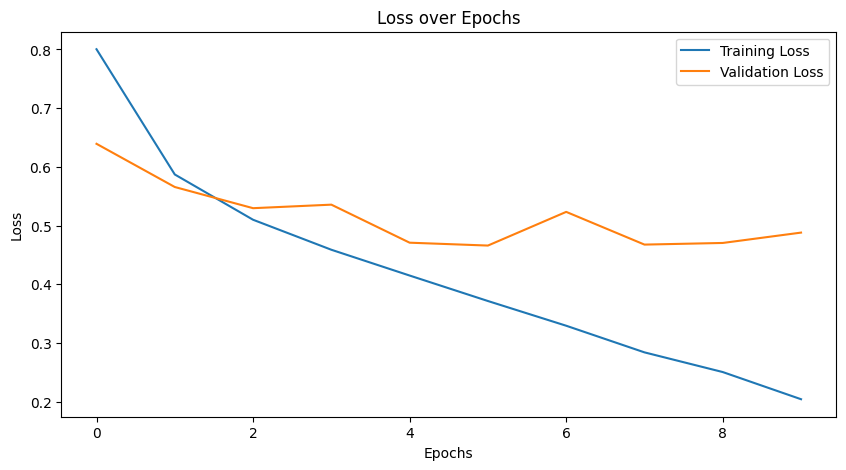

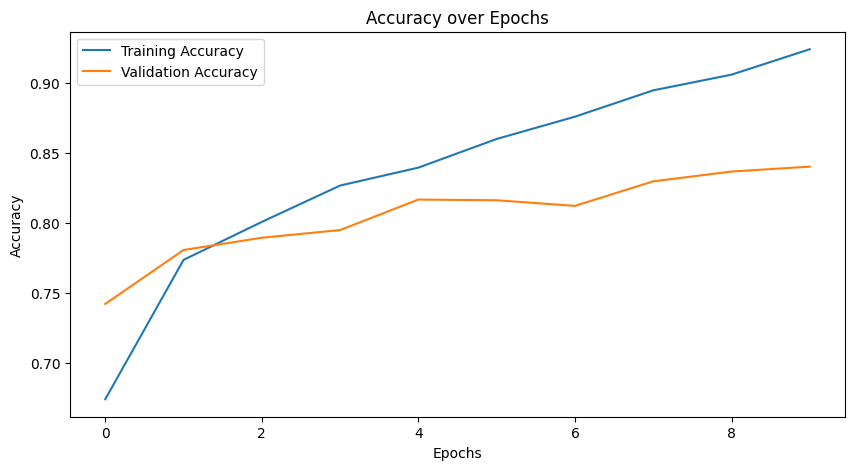

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test)
print("CNN Test Accuracy:", cnn_test_accuracy)


125/125 [==============================] - 1s 4ms/step - loss: 0.4880 - accuracy: 0.8403
CNN Test Accuracy: 0.8402500152587891


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize labels for AUC calculation
y_test_binarized = label_binarize(y_test, classes=np.arange(4))

# Example for CNN predictions
cnn_preds_proba = cnn_model.predict(X_test)
cnn_auc = roc_auc_score(y_test_binarized, cnn_preds_proba, multi_class='ovr')

print("CNN AUC:", cnn_auc)


In [ ]:
# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])



NameError: name 'tf' is not defined

With Featur Reduction

In [ ]:
from sklearn.decomposition import PCA

# Retain 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

print(f"Original Feature Dimensions: {X_train_flat.shape[1]}")
print(f"Reduced Feature Dimensions: {X_train_pca.shape[1]}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_flat, y_train)

# Get feature importance
feature_importances = rf.feature_importances_

# Select top-k features (e.g., top 100)
top_k = 100
important_indices = np.argsort(feature_importances)[::-1][:top_k]

X_train_selected = X_train_flat[:, important_indices]
X_test_selected = X_test_flat[:, important_indices]

print(f"Selected Top-{top_k} Features Based on Importance")


In [ ]:
bagging_model.fit(X_train_pca, y_train)
bagging_preds = bagging_model.predict(X_test_pca)
print("Bagging Model Accuracy with PCA:", accuracy_score(y_test, bagging_preds))


In [ ]:
# Reshape PCA-reduced data for CNN
X_train_cnn = X_train_pca.reshape(-1, 8, 8, 1)  # Example reshaping for 8x8
X_test_cnn = X_test_pca.reshape(-1, 8, 8, 1)

cnn_model.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_test_cnn, y_test))


In [ ]:
import matplotlib.pyplot as plt

# Plot top features
plt.figure(figsize=(10, 5))
plt.barh(range(top_k), feature_importances[important_indices][::-1])
plt.yticks(range(top_k), [f"Feature {i}" for i in important_indices[::-1]])
plt.title("Top Feature Importances")
plt.xlabel("Importance Score")
plt.show()
